# Source of Data: 

Erdogdu Sakar, B., Isenkul, M., Sakar, C.O., Sertbas, A., Gurgen, F., Delil, S., Apaydin, H., Kursun, O., 'Collection and Analysis of a Parkinson Speech Dataset with Multiple Types of Sound Recordings', IEEE Journal of Biomedical and Health Informatics, vol. 17(4), pp. 828-834, 2013.

As found on  
https://archive.ics.uci.edu/ml/datasets/Parkinson+Speech+Dataset+with++Multiple+Types+of+Sound+Recordings#

And available    
https://www.researchgate.net/publication/260662600_Collection_and_Analysis_of_a_Parkinson_Speech_Dataset_With_Multiple_Types_of_Sound_Recordings

In [1]:
import sys
sys.version

'3.8.5 | packaged by conda-forge | (default, Sep 24 2020, 16:20:24) [MSC v.1916 64 bit (AMD64)]'

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

import warnings
warnings.filterwarnings('ignore')
# Import the data
#training_target_df = pd.read_csv('data\Parkinson_Multiple_Sound_Recording\train_data.txt')

sample_descriptions = ['sust_a', 'sust_o', 'sust_u', 'num01', 'num02', 'num03', 'num04', 'num05', 'num06', 'num07', 'num08', 'num09', 
              'num10', 'sentence1', 'sentence2', 'sentence3', 'word1 through word9']
colheadings_train = ['ID', 
               'jitter_local', 'jitter_local_abs', 'jitter_rap', 'jitter_ppq5', 'jitter_ddp',
               'shimmer_local', 'shimmer_local_dB', 'shimmer_apq3', 'shimmerapq5', 'shimmer_apq11', 'shimmer_dda',
               'AC', 'NTH', 'HTN',
               'median_pitch', 'mean_pitch', 'std_dev', 'min_pitch', 'max_pitch',
               'num_pulses', 'num_periods', 'mean_period', 'std_dev_of_period', 
               'fraction_of_locally_unvoiced_frames', 'num_voice_breaks', 'degree_of_voice_breaks',
                'UPDRS', 'class_info'
              ]
colheadings_test = ['ID', 
               'jitter_local', 'jitter_local_abs', 'jitter_rap', 'jitter_ppq5', 'jitter_ddp',
               'shimmer_local', 'shimmer_local_dB', 'shimmer_apq3', 'shimmerapq5', 'shimmer_apq11', 'shimmer_dda',
               'AC', 'NTH', 'HTN',
               'median_pitch', 'mean_pitch', 'std_dev', 'min_pitch', 'max_pitch',
               'num_pulses', 'num_periods', 'mean_period', 'std_dev_of_period', 
               'fraction_of_locally_unvoiced_frames', 'num_voice_breaks', 'degree_of_voice_breaks',
               'class_info'
              ]
train_df = pd.read_csv('data/Parkinson_Multiple_Sound_Recording/train_data.txt', sep=",", header=None, names=colheadings_train)
test_df = pd.read_csv('data/Parkinson_Multiple_Sound_Recording/test_data.txt', sep=",", header=None, names=colheadings_test)
#training_df.columns = colheadings
#test_df = pd.read_csv('data\Parkinson_Multiple_Sound_Recording\test_data.txt', sep=",", header=None)
#st_unlabeled_df = pd.read_csv('data\Parkinson_Multiple_Sound_Recording\water_test-Copy1.csv')

In [4]:
train_df.head()

,ID,jitter_local,jitter_local_abs,jitter_rap,jitter_ppq5,jitter_ddp,shimmer_local,shimmer_local_dB,shimmer_apq3,shimmerapq5,...,max_pitch,num_pulses,num_periods,mean_period,std_dev_of_period,fraction_of_locally_unvoiced_frames,num_voice_breaks,degree_of_voice_breaks,UPDRS,class_info
0,1,1.488,0.000090,0.900,0.794,2.699,8.334,0.779,4.517,4.609,...,187.576,160,159,0.006065,0.000416,0.000,0,0.000,23,1
1,1,0.728,0.000038,0.353,0.376,1.059,5.864,0.642,2.058,3.180,...,234.505,170,169,0.005181,0.000403,2.247,0,0.000,23,1
2,1,1.220,0.000074,0.732,0.670,2.196,8.719,0.875,4.347,5.166,...,211.442,1431,1427,0.006071,0.000474,10.656,1,0.178,23,1
3,1,2.502,0.000123,1.156,1.634,3.469,13.513,1.273,5.263,8.771,...,220.230,94,92,0.004910,0.000320,0.000,0,0.000,23,1
4,1,3.509,0.000167,1.715,1.539,5.145,9.112,1.040,3.102,4.927,...,225.162,117,114,0.004757,0.000380,18.182,1,13.318,23,1


In [5]:
print(f'{train_df.shape[0]} samples and {train_df.shape[1]} features in the training market dataset.')

1040 samples and 29 features in the training market dataset.


In [6]:
test_df.head()

,ID,jitter_local,jitter_local_abs,jitter_rap,jitter_ppq5,jitter_ddp,shimmer_local,shimmer_local_dB,shimmer_apq3,shimmerapq5,...,min_pitch,max_pitch,num_pulses,num_periods,mean_period,std_dev_of_period,fraction_of_locally_unvoiced_frames,num_voice_breaks,degree_of_voice_breaks,class_info
0,1,0.135,0.000007,0.067,0.078,0.202,2.033,0.178,1.074,1.336,...,184.502,187.880,183.0,182.0,0.005368,0.000025,0.0,0.0,0.0,1
1,1,0.143,0.000007,0.073,0.081,0.219,1.236,0.107,0.612,0.904,...,198.665,202.214,194.0,193.0,0.004988,0.000020,0.0,0.0,0.0,1
2,1,0.162,0.000008,0.087,0.089,0.260,1.338,0.117,0.630,0.948,...,197.220,206.060,198.0,197.0,0.004940,0.000046,0.0,0.0,0.0,1
3,1,0.140,0.000007,0.075,0.089,0.224,1.086,0.094,0.556,0.747,...,202.324,206.182,200.0,199.0,0.004900,0.000023,0.0,0.0,0.0,1
4,1,0.150,0.000007,0.080,0.097,0.240,1.049,0.091,0.533,0.698,...,205.407,209.927,204.0,203.0,0.004820,0.000022,0.0,0.0,0.0,1


In [7]:
train_df.head()
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1040 entries, 0 to 1039
Data columns (total 29 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ID                                   1040 non-null   int64  
 1   jitter_local                         1040 non-null   float64
 2   jitter_local_abs                     1040 non-null   float64
 3   jitter_rap                           1040 non-null   float64
 4   jitter_ppq5                          1040 non-null   float64
 5   jitter_ddp                           1040 non-null   float64
 6   shimmer_local                        1040 non-null   float64
 7   shimmer_local_dB                     1040 non-null   float64
 8   shimmer_apq3                         1040 non-null   float64
 9   shimmerapq5                          1040 non-null   float64
 10  shimmer_apq11                        1040 non-null   float64
 11  shimmer_dda                   

In [8]:
train_df.isna().sum()

ID                                     0
jitter_local                           0
jitter_local_abs                       0
jitter_rap                             0
jitter_ppq5                            0
jitter_ddp                             0
shimmer_local                          0
shimmer_local_dB                       0
shimmer_apq3                           0
shimmerapq5                            0
shimmer_apq11                          0
shimmer_dda                            0
AC                                     0
NTH                                    0
HTN                                    0
median_pitch                           0
mean_pitch                             0
std_dev                                0
min_pitch                              0
max_pitch                              0
num_pulses                             0
num_periods                            0
mean_period                            0
std_dev_of_period                      0
fraction_of_loca

In [9]:
display(train_df['UPDRS'].value_counts())
train_df['class_info'].value_counts()

1     520
5      78
46     52
40     52
32     52
23     52
55     26
31     26
26     26
24     26
20     26
16     26
12     26
11     26
8      26
Name: UPDRS, dtype: int64

1    520
0    520
Name: class_info, dtype: int64

# Metrics  
Let's define some metrics - the usuals, plus a new one mentioned in the research paper that provided this data, namely MCC.

In [10]:
def precision(y, y_hat):
    # Your code here
    # precision = true positives / all predicted positives
#     resid = y-y_hat
    cmatrix = {}
    lt = list(y)
    lp = list(y_hat)
    for i in range(len(lt)):
        if lt[i] == 1 and lp[i] == 1:
            cmatrix['TP'] = cmatrix.get('TP', 0) + 1
        elif lt[i] == 1 and lp[i] == 0:
            cmatrix['FN'] = cmatrix.get('FN', 0) + 1
        elif lt[i] == 0 and lp[i] == 1:
            cmatrix['FP'] = cmatrix.get('FP', 0) + 1            
        elif lt[i] == 0 and lp[i] == 0:
            cmatrix['TN'] = cmatrix.get('TN', 0) + 1    
    return cmatrix['TP']/(cmatrix['TP']+cmatrix['FP'])
    
    
def recall(y, y_hat):
    # Your code here
    # recall = true pos / actual total positives
    cmatrix = {}
    lt = list(y)
    lp = list(y_hat)
    for i in range(len(lt)):
        if lt[i] == 1 and lp[i] == 1:
            cmatrix['TP'] = cmatrix.get('TP', 0) + 1
        elif lt[i] == 1 and lp[i] == 0:
            cmatrix['FN'] = cmatrix.get('FN', 0) + 1
        elif lt[i] == 0 and lp[i] == 1:
            cmatrix['FP'] = cmatrix.get('FP', 0) + 1            
        elif lt[i] == 0 and lp[i] == 0:
            cmatrix['TN'] = cmatrix.get('TN', 0) + 1    
    return cmatrix['TP']/(cmatrix['TP']+cmatrix['FN'])

def accuracy(y, y_hat):
    # Your code here
    # accuracy  = (number of true pos + true neg)/ total obs
    cmatrix = {}
    lt = list(y)
    lp = list(y_hat)
    for i in range(len(lt)):
        if lt[i] == 1 and lp[i] == 1:
            cmatrix['TP'] = cmatrix.get('TP', 0) + 1
        elif lt[i] == 1 and lp[i] == 0:
            cmatrix['FN'] = cmatrix.get('FN', 0) + 1
        elif lt[i] == 0 and lp[i] == 1:
            cmatrix['FP'] = cmatrix.get('FP', 0) + 1            
        elif lt[i] == 0 and lp[i] == 0:
            cmatrix['TN'] = cmatrix.get('TN', 0) + 1    
    return (cmatrix['TP']+cmatrix['TN'])/len(y)

def f1_score(y, y_hat):
    # Your code here
    # 2(precision*recall)/(precision+recall)
    prec = precision(y, y_hat)
    rec = recall(y, y_hat)
    return 2*(prec*rec)/(prec+rec)

def mcc(y, y_hat):
    #MCC =(TPxTN −FPxFN) / sqrt((TP +FP)(TP +FN)(TN +FP)(TN +FN))
    cmatrix = {}
    lt = list(y)
    lp = list(y_hat)
    for i in range(len(lt)):
        if lt[i] == 1 and lp[i] == 1:
            cmatrix['TP'] = cmatrix.get('TP', 0) + 1
        elif lt[i] == 1 and lp[i] == 0:
            cmatrix['FN'] = cmatrix.get('FN', 0) + 1
        elif lt[i] == 0 and lp[i] == 1:
            cmatrix['FP'] = cmatrix.get('FP', 0) + 1            
        elif lt[i] == 0 and lp[i] == 0:
            cmatrix['TN'] = cmatrix.get('TN', 0) + 1
    TP = cmatrix['TP']
    TN = cmatrix['TN']
    FP = cmatrix['FP']
    FN = cmatrix['FN']
    return ((TP*TN - FP*FN) / np.sqrt((TP+FP)*(TP+FN)*(TN+FP)*(TN+FN)))

# Initial inspection of predictor/target variables

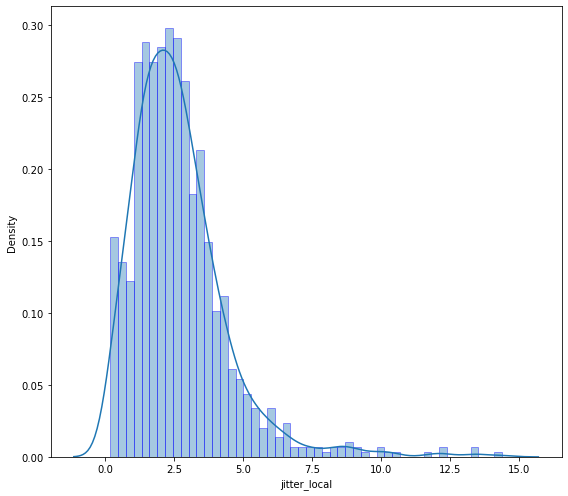

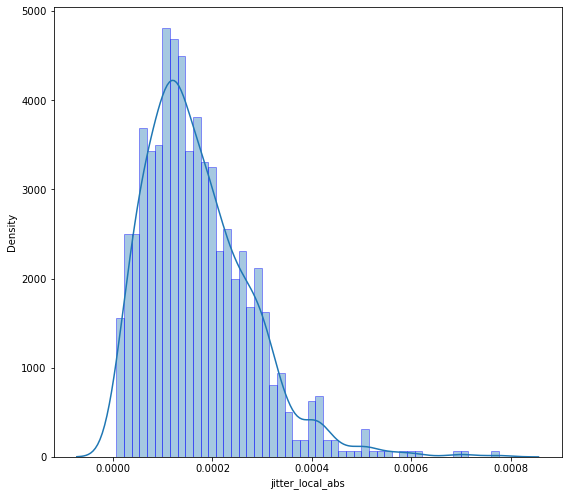

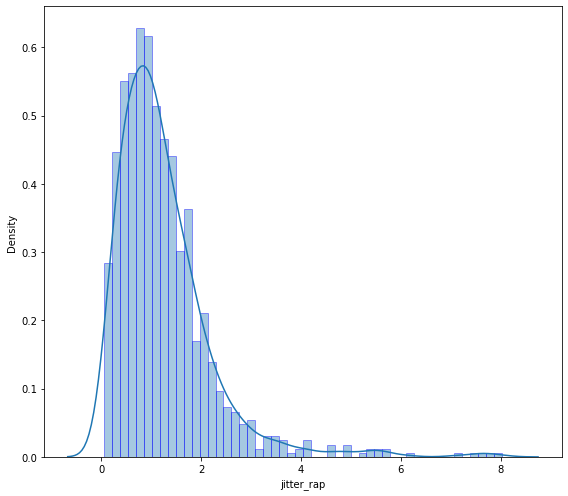

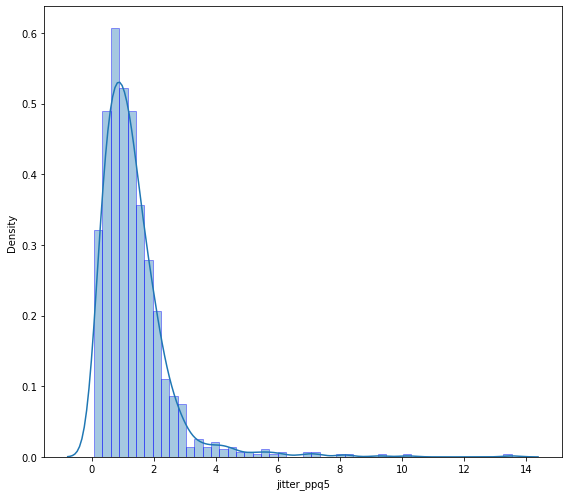

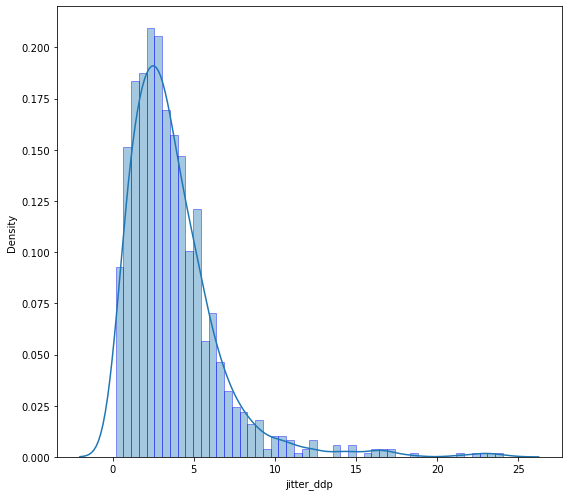

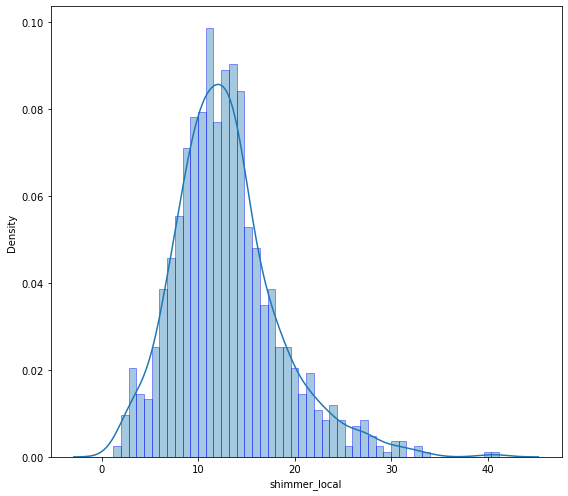

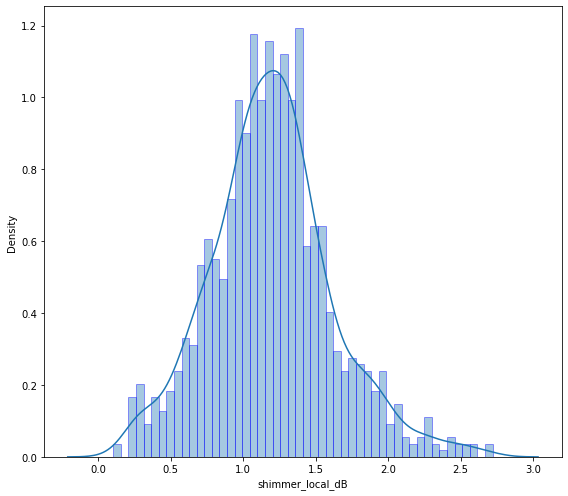

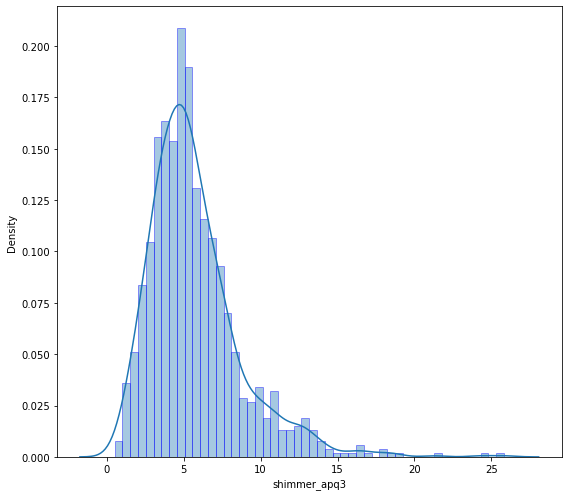

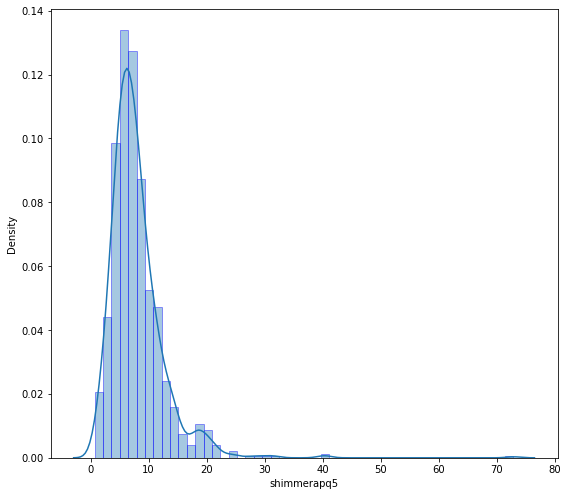

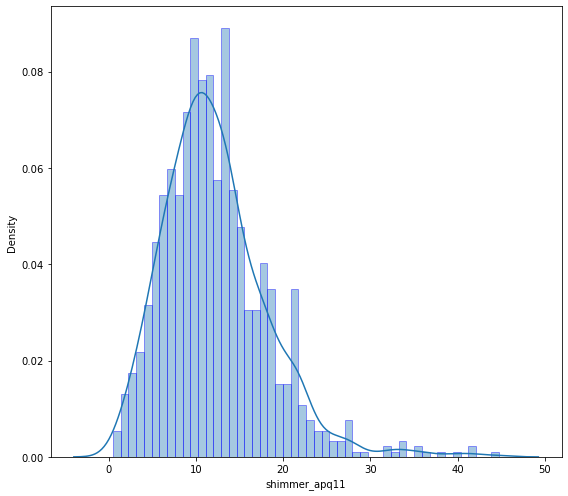

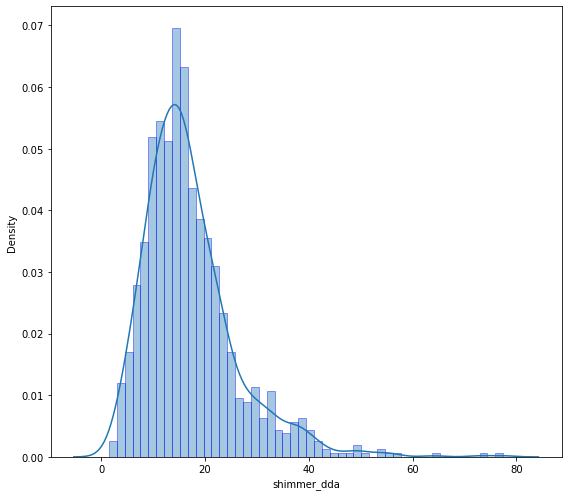

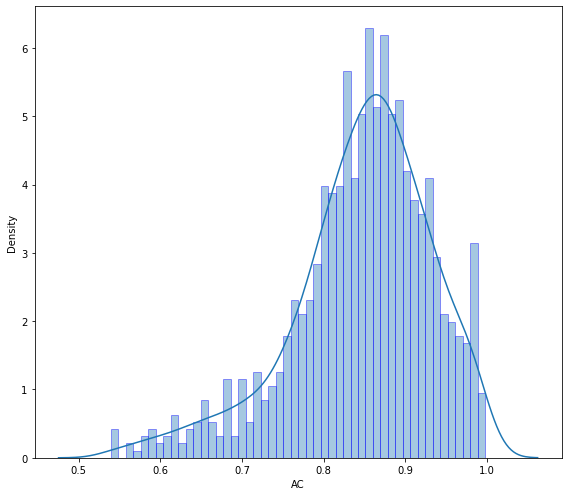

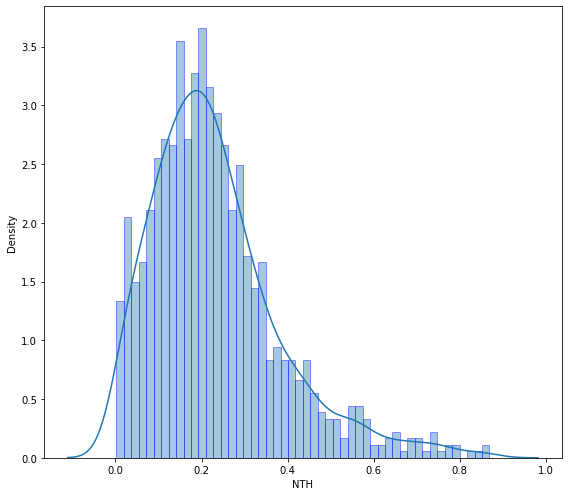

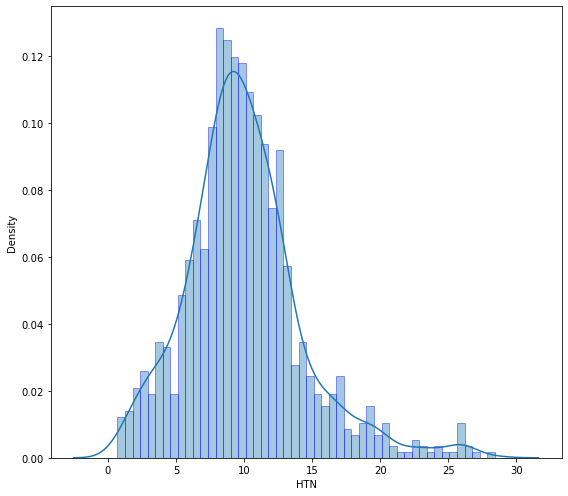

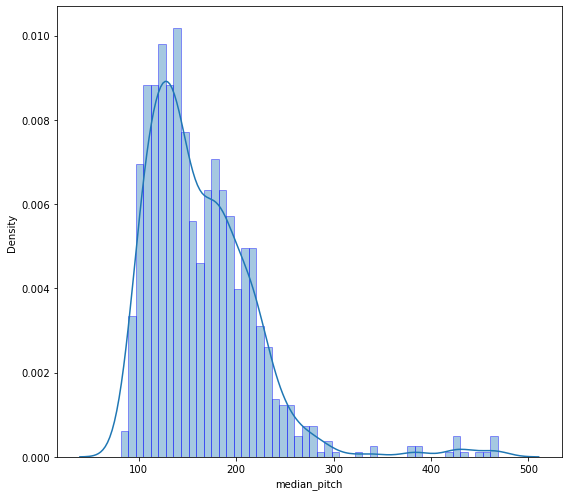

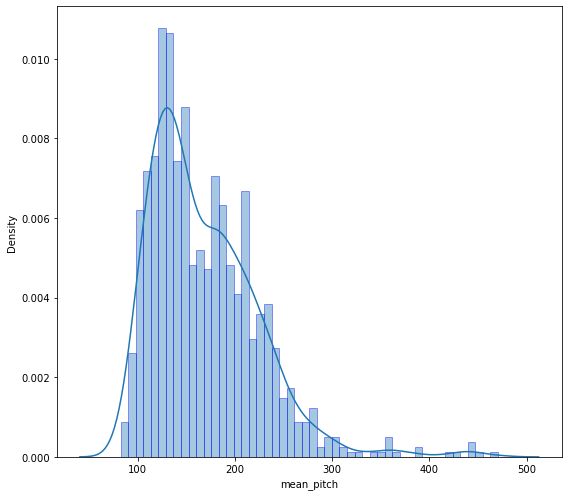

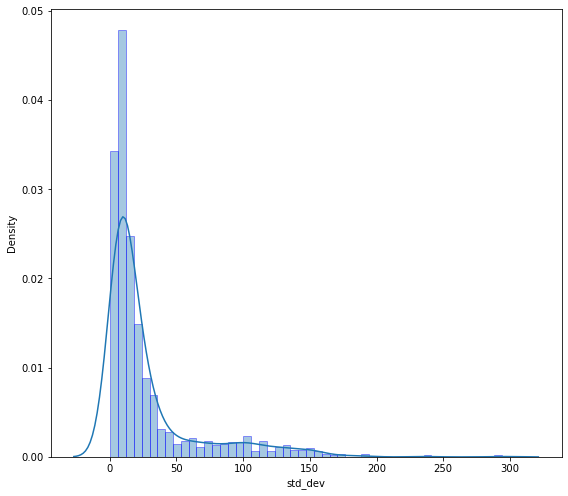

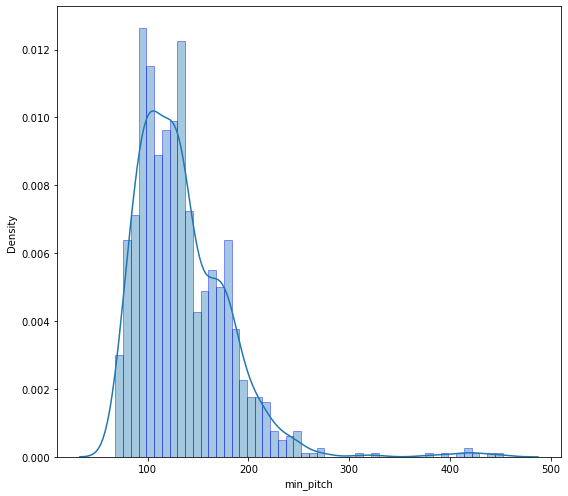

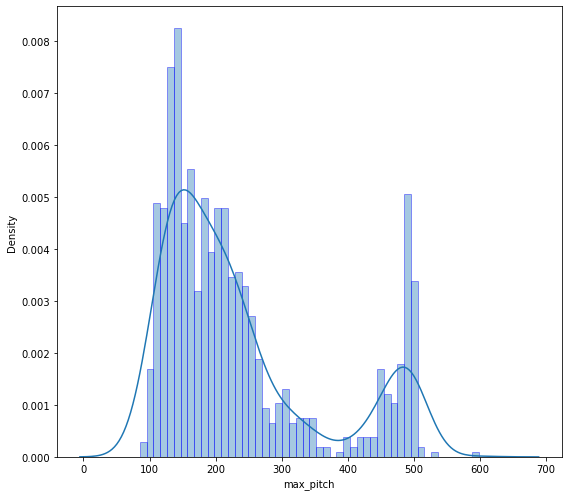

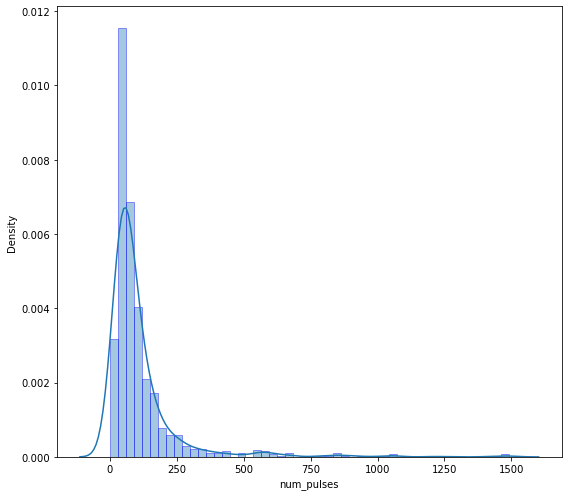

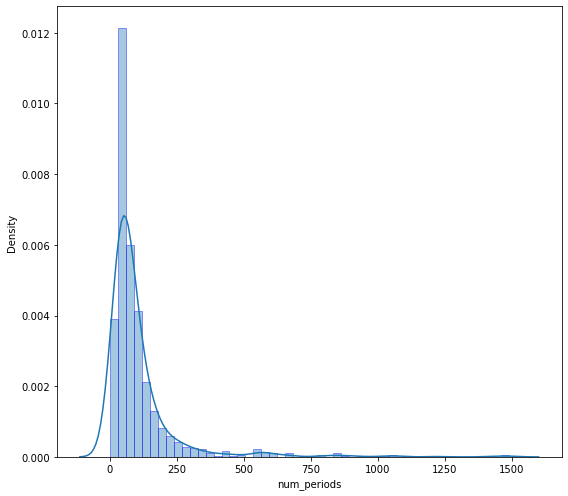

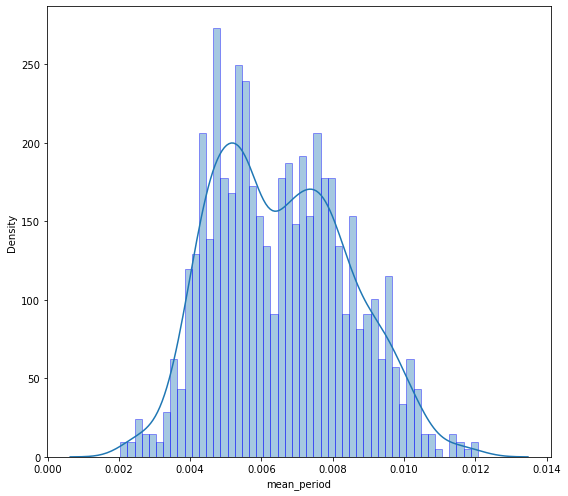

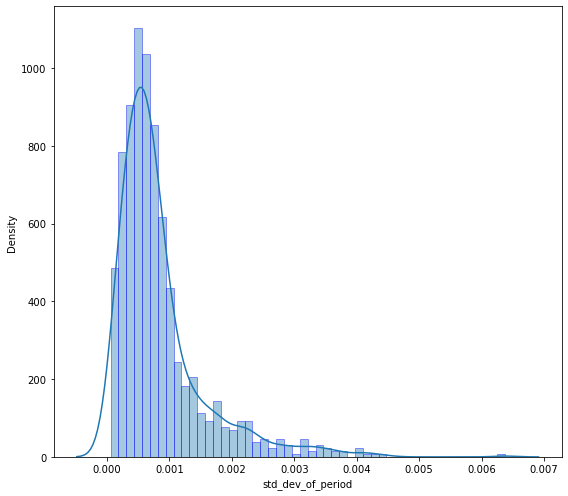

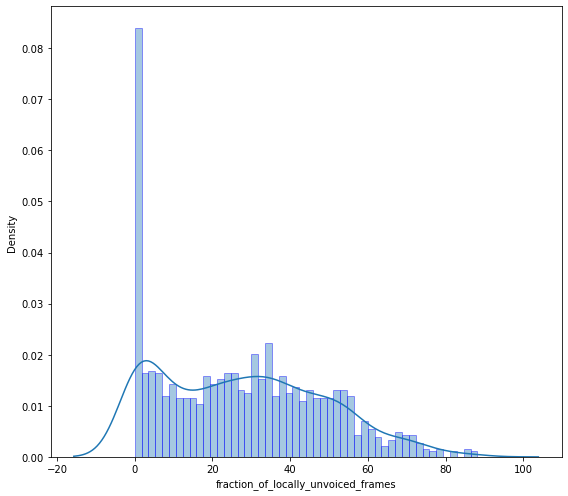

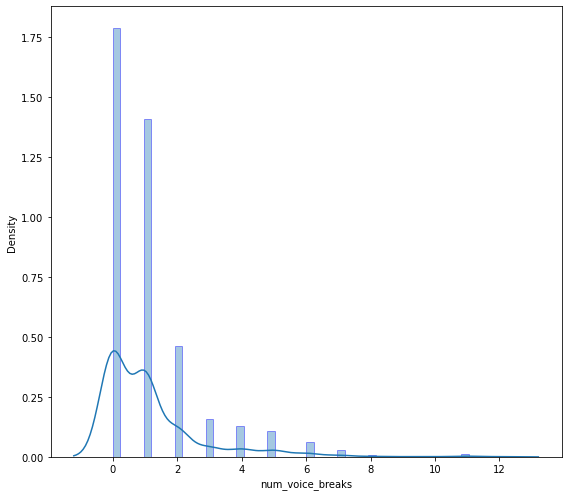

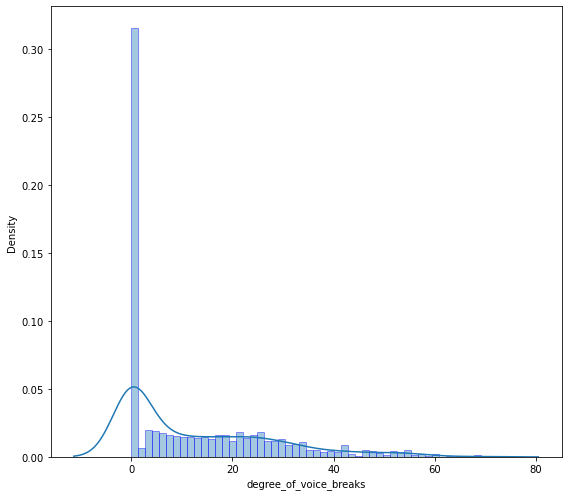

In [16]:
X = train_df.drop(['class_info', 'UPDRS', 'ID'], axis=1)
y = train_df['class_info']
target = 'class_info'
df = train_df

# plt.figure(figsize=(9, 5))
# col = 'jitter_local'
# sns.scatterplot(x=col, y=target, data=df).set_title('{} vs. {} EXAMPLE'.format(col, target))
# plt.ticklabel_format(style='plain')#style='plain', 'sci', 'scientific'

for col in X.columns:
#for col in ['jitter_local']:
    #scatter plots for each
    #plt.figure(figsize=(9, 5))
    #note that this plot is basically not helpful for binary categorization
    #sns.scatterplot(x=col, y=target, data=train_df).set_title('{} vs. {}'.format(col, target))
    #plt.ticklabel_format(style='plain')#style='plain', 'sci', 'scientific'
    
#     fig, axes = plt.subplots(1, 2, figsize=(12, 6))
#     axes[0].set_title('{} Count'.format(col))
#     sns.countplot(df[col], ax=axes[0], color='purple')
#     axes[1].set_title('{} vs. {}'.format(col, target))
#     sns.boxplot(x=col, y=target, data=df, ax=axes[1])
    
    plt.figure(figsize=(8, 7))
    sns.distplot(X[col], bins=50, hist_kws=dict(edgecolor="blue", linewidth=1))
    plt.ticklabel_format(style='plain')
    

    plt.tight_layout()

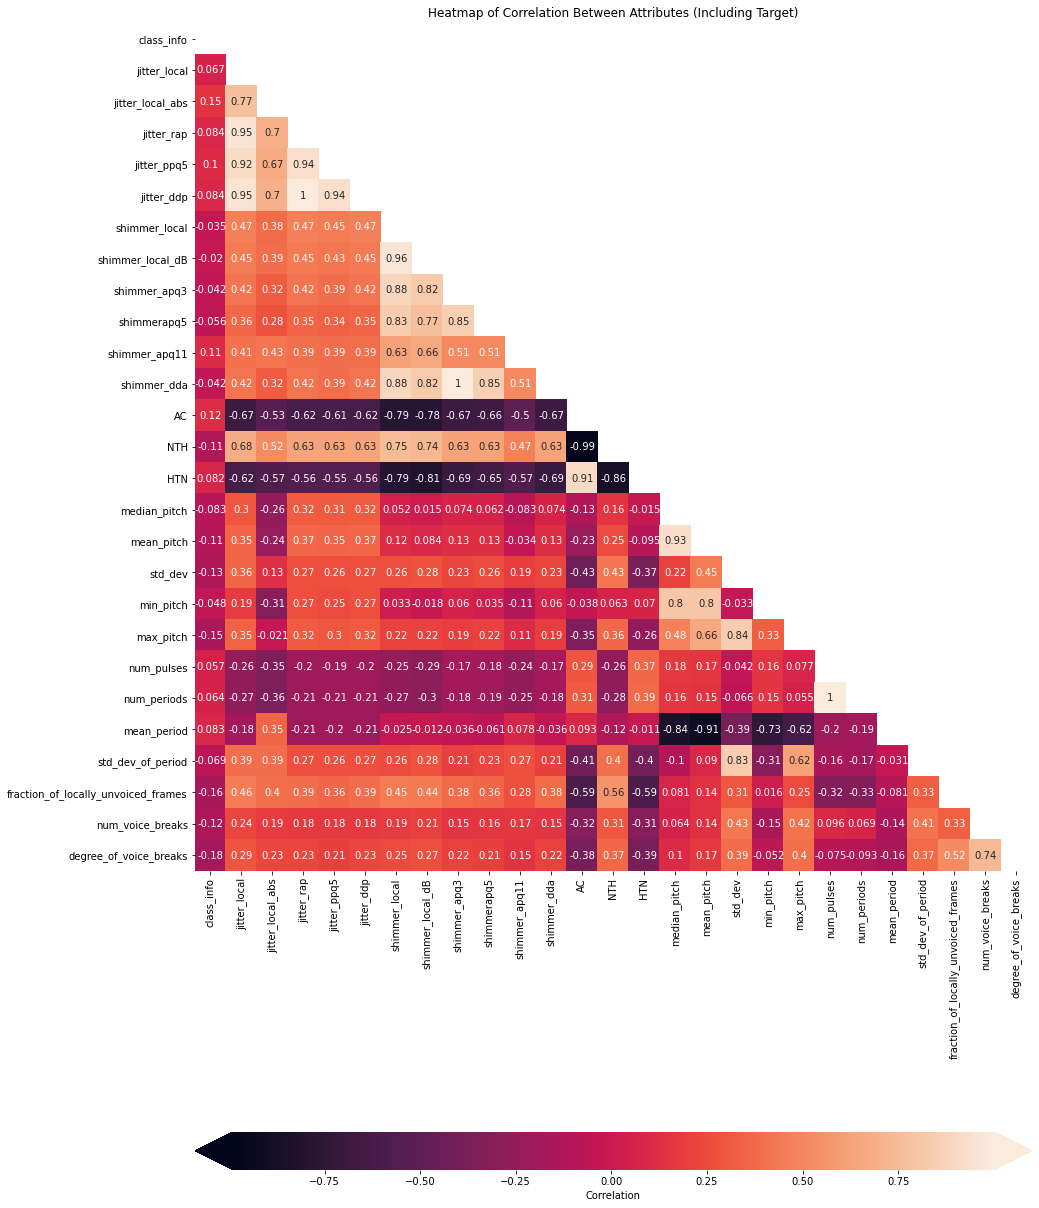

In [37]:
heatmap_data = pd.concat([y_train, X_train], axis=1)
corr = heatmap_data.corr()

fig, ax = plt.subplots(figsize=(15, 24))

# Plot a heatmap of the correlation matrix, with both
# numbers and colors indicating the correlations
sns.heatmap(
    # Specifies the data to be plotted
    data=corr,
    # The mask means we only show half the values,
    # instead of showing duplicates. It's optional.
    mask=np.triu(np.ones_like(corr, dtype=bool)),
    # Specifies that we should use the existing axes
    ax=ax,
    # Specifies that we want labels, not just colors
    annot=True,
    # Customizes colorbar appearance
    cbar_kws={"label": "Correlation", "orientation": "horizontal", "pad": .2, "extend": "both"}
)

# Customize the plot appearance
ax.set_title("Heatmap of Correlation Between Attributes (Including Target)");

In [8]:
X = train_df.drop(['class_info', 'UPDRS', 'ID'], axis=1)
y = train_df['class_info']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=7)

In [9]:
print(len(X_train.columns))
X_train.columns


26


Index(['jitter_local', 'jitter_local_abs', 'jitter_rap', 'jitter_ppq5',
       'jitter_ddp', 'shimmer_local', 'shimmer_local_dB', 'shimmer_apq3',
       'shimmerapq5', 'shimmer_apq11', 'shimmer_dda', 'AC', 'NTH', 'HTN',
       'median_pitch', 'mean_pitch', 'std_dev', 'min_pitch', 'max_pitch',
       'num_pulses', 'num_periods', 'mean_period', 'std_dev_of_period',
       'fraction_of_locally_unvoiced_frames', 'num_voice_breaks',
       'degree_of_voice_breaks'],
      dtype='object')

In [10]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

pipe = make_pipeline(
    #OneHotEncoder(categories='auto'),
    LogisticRegression(solver='lbfgs', multi_class='ovr',
                      max_iter=500))
pipe.fit(X_train,y_train)

Pipeline(steps=[('logisticregression',
                 LogisticRegression(max_iter=500, multi_class='ovr'))])

In [11]:
from sklearn.metrics import accuracy_score

# What's the accuracy of this prediction, measured against the training dataset?
y_pred = pipe.predict(X_train)
accuracy_score(y_train, y_pred)

0.6525641025641026

In [12]:
logreg = LogisticRegression(solver='lbfgs', multi_class='ovr',
                      max_iter=500)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_train)
accuracy_score(y_train, y_pred)

0.6525641025641026

In [13]:
logreg.coef_


array([[ 1.54804988e-01,  3.14149476e-05,  2.34091789e-02,
         1.74158654e-01,  7.01467766e-02, -1.19508234e-02,
         4.04086566e-02,  2.34909299e-03, -4.77031796e-02,
         6.07979597e-02,  6.75327727e-03, -2.25629989e-02,
        -8.04119567e-02,  2.07134194e-02, -1.66760174e-03,
         1.52512723e-03,  6.39924693e-03, -1.33110162e-03,
        -2.56970121e-03, -1.42302696e-01,  1.43753175e-01,
        -1.18149991e-03, -6.87832957e-05, -1.63399729e-02,
         2.11764254e-01, -1.90805039e-02]])

In [14]:
#test_df
y_test_pred = logreg.predict(test_df.drop(['class_info', 'ID'], axis=1))
accuracy_score(test_df['class_info'], y_test_pred)

0.5357142857142857

In [15]:
test_X = test_df.drop(['class_info', 'ID'], axis=1)
len(test_X.columns)
test_X.columns
y_test_pred = pipe.predict(test_X)
accuracy_score(test_df['class_info'], y_test_pred)

0.5357142857142857

In [16]:
'''params = {'learning_rate': 0.01, 'max_depth': 12, 'boosting': 'gbdt', 'objective': 'binary', 'metric': 'auc', 'is_training_metric': True, 'seed': 42}
model = lgb.train(params, train_set=lgb.Dataset(X_train, label=up_train), num_boost_round=2000,
                  valid_sets=[lgb.Dataset(X_train, label=up_train), lgb.Dataset(X_test, label=up_test)],
                  verbose_eval=100, early_stopping_rounds=100)'''

"params = {'learning_rate': 0.01, 'max_depth': 12, 'boosting': 'gbdt', 'objective': 'binary', 'metric': 'auc', 'is_training_metric': True, 'seed': 42}\nmodel = lgb.train(params, train_set=lgb.Dataset(X_train, label=up_train), num_boost_round=2000,\n                  valid_sets=[lgb.Dataset(X_train, label=up_train), lgb.Dataset(X_test, label=up_test)],\n                  verbose_eval=100, early_stopping_rounds=100)"

In [17]:
from xgboost import XGBClassifier

In [29]:
from xgboost import XGBClassifier
clf = XGBClassifier()

# Fit XGBClassifier
clf.fit(X_train, y_train, eval_metric='logloss')

# Predict on training and test sets
training_preds = clf.predict(X_train)
test_preds = clf.predict(X_test)

# Accuracy of training and test sets
training_accuracy = accuracy_score(y_train, training_preds)
test_accuracy = accuracy_score(y_test, test_preds)

print('Training Accuracy: {:.4}%'.format(training_accuracy * 100))
print('Validation accuracy: {:.4}%'.format(test_accuracy * 100))

##tune parameters
param_grid = {
    'learning_rate': [0.1, 0.2],
    'max_depth': [6],
    'min_child_weight': [1, 2],
    'subsample': [0.5, 0.7],
    'n_estimators': [100],
}
grid_clf = GridSearchCV(clf, param_grid, scoring='accuracy', cv=None, n_jobs=1 )
grid_clf.fit(X_train, y_train, eval_metric='logloss')

best_parameters = grid_clf.best_params_

print('Grid Search found the following optimal parameters: ')
for param_name in sorted(best_parameters.keys()):
    print('%s: %r' % (param_name, best_parameters[param_name]))

training_preds = grid_clf.predict(X_train)
test_preds = grid_clf.predict(X_test)
training_accuracy = accuracy_score(y_train, training_preds)
test_accuracy = accuracy_score(y_test, test_preds)

print('')
print('Training Accuracy: {:.4}%'.format(training_accuracy * 100))
print('Validation accuracy: {:.4}%'.format(test_accuracy * 100))


Training Accuracy: 100.0%
Validation accuracy: 70.0%
Grid Search found the following optimal parameters: 
learning_rate: 0.1
max_depth: 6
min_child_weight: 2
n_estimators: 100
subsample: 0.7

Training Accuracy: 100.0%
Validation accuracy: 70.77%


In [27]:
import sys
sys.version

'3.8.5 | packaged by conda-forge | (default, Sep 24 2020, 16:20:24) [MSC v.1916 64 bit (AMD64)]'